In [1]:
import sympy as sp
import numpy as np
from scipy.optimize import brentq
import matplotlib.pyplot as plt

# 2D

We use the following eqations

Th energy is defined as
$$E = -\epsilon (N_{++}+N_{--}-N_{+-}) = -\frac{\epsilon z N}{2} \left( 1-2\frac{1-m^2}{1+\alpha} \right)$$

$\alpha$ is defined as
$$\alpha = \left[ 1+(1-m^2)(y^2-1) \right]^\frac{1}{2}$$

$y$ is defined as 
$$y = \exp \left(2\epsilon \beta \right)$$

In [2]:
E_sym, alpha_sym, y_sym, epsilon, beta, m, N, z, y_sym = sp.symbols('E, alpha, y, epsilon, beta, m, N, z, y')

E = -epsilon*z*N/2 * (1-2*((1-m**2)/(1+alpha_sym)))
display((sp.Eq(E_sym,E)))

alpha = (1+(1-m**2)*(y_sym**2-1))**0.5
display((sp.Eq(alpha_sym, alpha)))

y = sp.exp(2*epsilon*beta)
display((sp.Eq(y_sym,y)))

Eq(E, -N*epsilon*z*(-2*(1 - m**2)/(alpha + 1) + 1)/2)

Eq(alpha, ((1 - m**2)*(y**2 - 1) + 1)**0.5)

Eq(y, exp(2*beta*epsilon))

We consider the case of a square lattice ($z=4$). We take a unit of 5 lattice site.

We proceed using the ansatz that we can replace $m^2$ in the eqtuations for $E$ and $\alpha$ by $m \times \frac{\text{(magnetization of the unit of 5 lattice site)}}{5}$. 

This gives us 32 possible arraganements, $E1 = E_{5\uparrow}$, $E2 = E_{4\uparrow 1\downarrow},$ ... $E32 = E_{5\downarrow}$. Further we define the change in energy from the original as 

$$\Delta E_{5\uparrow} = E_{5\uparrow} - E$$
$$\Delta E_{4\uparrow 1\downarrow} = E_{4\uparrow 1\downarrow} - E$$
$$\vdots$$
$$\Delta E_{5\downarrow} = E_{5\downarrow} - E$$

Note that many of these cases will be degenerate.

In [3]:
E_list = []

for i1 in [1,-1]:
    for i2 in [1,-1]:
        for i3 in [1,-1]:
            for i4 in [1,-1]:
                for i5 in [1,-1]:
                    for i6 in [1,-1]:
                        for i7 in [1,-1]:
                            temp = E.subs(alpha_sym,alpha)
                            temp = temp.subs(y_sym,y)
                            E_alpha_subs = temp.subs(y_sym,y)
                            temp = temp.subs(m**2,(i1+i2+i3)*m/3)
                            temp = temp - E_alpha_subs
                            E_list.append(temp)
                    

Define $$V = \sum_\sigma \exp(-\beta \Delta E_\sigma)$$

In [4]:
V = 0

for i in E_list:
    V = V + sp.exp(-beta*i)
    
display((V))

16*exp(-beta*(N*epsilon*z*(-2*(1 - m**2)/(((1 - m**2)*(exp(4*beta*epsilon) - 1) + 1)**0.5 + 1) + 1)/2 - N*epsilon*z*(-2*(m + 1)/(((m + 1)*(exp(4*beta*epsilon) - 1) + 1)**0.5 + 1) + 1)/2)) + 48*exp(-beta*(N*epsilon*z*(-2*(1 - m**2)/(((1 - m**2)*(exp(4*beta*epsilon) - 1) + 1)**0.5 + 1) + 1)/2 - N*epsilon*z*(-2*(m/3 + 1)/(((m/3 + 1)*(exp(4*beta*epsilon) - 1) + 1)**0.5 + 1) + 1)/2)) + 48*exp(-beta*(-N*epsilon*z*(-2*(1 - m/3)/(((1 - m/3)*(exp(4*beta*epsilon) - 1) + 1)**0.5 + 1) + 1)/2 + N*epsilon*z*(-2*(1 - m**2)/(((1 - m**2)*(exp(4*beta*epsilon) - 1) + 1)**0.5 + 1) + 1)/2)) + 16*exp(-beta*(-N*epsilon*z*(-2*(1 - m)/(((1 - m)*(exp(4*beta*epsilon) - 1) + 1)**0.5 + 1) + 1)/2 + N*epsilon*z*(-2*(1 - m**2)/(((1 - m**2)*(exp(4*beta*epsilon) - 1) + 1)**0.5 + 1) + 1)/2))

We now use $$<\Delta E> = -\frac{\partial}{\partial \beta}\ln(V)$$

In [5]:
del_E = -sp.diff(sp.log(V),beta)
display((sp.Eq(del_E,0)))

Eq(-(16*(N*epsilon*z*(-2*(1 - m)/(((1 - m)*(exp(4*beta*epsilon) - 1) + 1)**0.5 + 1) + 1)/2 - N*epsilon*z*(-2*(1 - m**2)/(((1 - m**2)*(exp(4*beta*epsilon) - 1) + 1)**0.5 + 1) + 1)/2 - beta*(-2.0*N*epsilon**2*z*(1 - m)**2*((1 - m)*(exp(4*beta*epsilon) - 1) + 1)**(-0.5)*exp(4*beta*epsilon)/(((1 - m)*(exp(4*beta*epsilon) - 1) + 1)**0.5 + 1)**2 + 2.0*N*epsilon**2*z*(1 - m**2)**2*((1 - m**2)*(exp(4*beta*epsilon) - 1) + 1)**(-0.5)*exp(4*beta*epsilon)/(((1 - m**2)*(exp(4*beta*epsilon) - 1) + 1)**0.5 + 1)**2))*exp(-beta*(-N*epsilon*z*(-2*(1 - m)/(((1 - m)*(exp(4*beta*epsilon) - 1) + 1)**0.5 + 1) + 1)/2 + N*epsilon*z*(-2*(1 - m**2)/(((1 - m**2)*(exp(4*beta*epsilon) - 1) + 1)**0.5 + 1) + 1)/2)) + 48*(N*epsilon*z*(-2*(1 - m/3)/(((1 - m/3)*(exp(4*beta*epsilon) - 1) + 1)**0.5 + 1) + 1)/2 - N*epsilon*z*(-2*(1 - m**2)/(((1 - m**2)*(exp(4*beta*epsilon) - 1) + 1)**0.5 + 1) + 1)/2 - beta*(-2.0*N*epsilon**2*z*(1 - m/3)**2*((1 - m/3)*(exp(4*beta*epsilon) - 1) + 1)**(-0.5)*exp(4*beta*epsilon)/(((1 - m/3)*(e

To apply the Coherent Potential Approximation (CPA) we equate
$$<\Delta E> = -\frac{\partial}{\partial \beta}\ln(V) = 0$$

We remove the denominator obtained from previous step

In [6]:
CPA_E = 0

for i in E_list:
    CPA_E = CPA_E - sp.diff(sp.exp(-beta*i),beta)
    
display((sp.Eq(CPA_E,0)))

Eq(-16*(N*epsilon*z*(-2*(1 - m)/(((1 - m)*(exp(4*beta*epsilon) - 1) + 1)**0.5 + 1) + 1)/2 - N*epsilon*z*(-2*(1 - m**2)/(((1 - m**2)*(exp(4*beta*epsilon) - 1) + 1)**0.5 + 1) + 1)/2 - beta*(-2.0*N*epsilon**2*z*(1 - m)**2*((1 - m)*(exp(4*beta*epsilon) - 1) + 1)**(-0.5)*exp(4*beta*epsilon)/(((1 - m)*(exp(4*beta*epsilon) - 1) + 1)**0.5 + 1)**2 + 2.0*N*epsilon**2*z*(1 - m**2)**2*((1 - m**2)*(exp(4*beta*epsilon) - 1) + 1)**(-0.5)*exp(4*beta*epsilon)/(((1 - m**2)*(exp(4*beta*epsilon) - 1) + 1)**0.5 + 1)**2))*exp(-beta*(-N*epsilon*z*(-2*(1 - m)/(((1 - m)*(exp(4*beta*epsilon) - 1) + 1)**0.5 + 1) + 1)/2 + N*epsilon*z*(-2*(1 - m**2)/(((1 - m**2)*(exp(4*beta*epsilon) - 1) + 1)**0.5 + 1) + 1)/2)) - 48*(N*epsilon*z*(-2*(1 - m/3)/(((1 - m/3)*(exp(4*beta*epsilon) - 1) + 1)**0.5 + 1) + 1)/2 - N*epsilon*z*(-2*(1 - m**2)/(((1 - m**2)*(exp(4*beta*epsilon) - 1) + 1)**0.5 + 1) + 1)/2 - beta*(-2.0*N*epsilon**2*z*(1 - m/3)**2*((1 - m/3)*(exp(4*beta*epsilon) - 1) + 1)**(-0.5)*exp(4*beta*epsilon)/(((1 - m/3)*(ex

Substituting $z=4$, $\epsilon = 1$ and $N=1$

Substituting $N=1$ is equivalent to taking energy per site from the very beginning. (We are not considering a single point!)

In [7]:
CPA_E = CPA_E.subs(epsilon,1)
CPA_E = CPA_E.subs(z,4)
CPA_E = CPA_E.subs(N,1)
display((sp.Eq(CPA_E,0)))

Eq(-16*(-beta*(-8.0*(1 - m)**2*((1 - m)*(exp(4*beta) - 1) + 1)**(-0.5)*exp(4*beta)/(((1 - m)*(exp(4*beta) - 1) + 1)**0.5 + 1)**2 + 8.0*(1 - m**2)**2*((1 - m**2)*(exp(4*beta) - 1) + 1)**(-0.5)*exp(4*beta)/(((1 - m**2)*(exp(4*beta) - 1) + 1)**0.5 + 1)**2) - 4*(1 - m)/(((1 - m)*(exp(4*beta) - 1) + 1)**0.5 + 1) + 4*(1 - m**2)/(((1 - m**2)*(exp(4*beta) - 1) + 1)**0.5 + 1))*exp(-beta*(4*(1 - m)/(((1 - m)*(exp(4*beta) - 1) + 1)**0.5 + 1) - 4*(1 - m**2)/(((1 - m**2)*(exp(4*beta) - 1) + 1)**0.5 + 1))) - 48*(-beta*(-8.0*(1 - m/3)**2*((1 - m/3)*(exp(4*beta) - 1) + 1)**(-0.5)*exp(4*beta)/(((1 - m/3)*(exp(4*beta) - 1) + 1)**0.5 + 1)**2 + 8.0*(1 - m**2)**2*((1 - m**2)*(exp(4*beta) - 1) + 1)**(-0.5)*exp(4*beta)/(((1 - m**2)*(exp(4*beta) - 1) + 1)**0.5 + 1)**2) - 4*(1 - m/3)/(((1 - m/3)*(exp(4*beta) - 1) + 1)**0.5 + 1) + 4*(1 - m**2)/(((1 - m**2)*(exp(4*beta) - 1) + 1)**0.5 + 1))*exp(-beta*(4*(1 - m/3)/(((1 - m/3)*(exp(4*beta) - 1) + 1)**0.5 + 1) - 4*(1 - m**2)/(((1 - m**2)*(exp(4*beta) - 1) + 1)**0.5

In [8]:
CPA_E_subs = CPA_E.subs(beta,10)
lam_f = sp.lambdify(m,CPA_E_subs,'numpy') #Converting sympy symbols and function to numpy for easier numerical calculations

In [ ]:
#Finding the roots of the CPA equation. The curve is beta on x-axis vs m on y-axis.
#THere will be an error generated, but the program can be continued.

beta_val = 0.49
x_CPA = []
y_CPA = []
while beta_val<10:
    CPA_E_subs = CPA_E.subs(beta,beta_val)
    lam_f = sp.lambdify(m,CPA_E_subs,'numpy')
    root, info = brentq(lam_f, 0.01, 1, full_output=True)
    if(info.converged == True):
        x_CPA.append(beta_val)
        y_CPA.append(root)
    beta_val = beta_val+0.005
    


The final plot showing the convergence

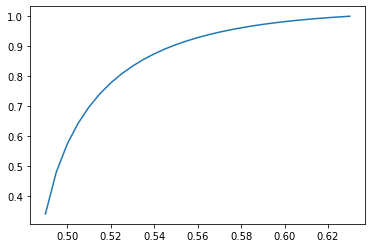

In [10]:
plt.plot(x_CPA,y_CPA)
plt.show()